# <h1> 6-1 군집 알고리즘 (Clustering)</h1>

* 비지도 학습 (Unsupervised Learning) : 타깃값이 없을때 데이터들의 패턴을 찾거나 데이터 구조를 파악하는 머신러닝 방식
* 군집 (Clustering) : 비슷한 샘플끼리 그룹으로 모으는 작업. 대표적인 비지도 학습 작업 중 하나
* 클러스터 (Cluster) : 군집 알고리즘에서 만든 그룹

 
---


<h3> 과일 사진 분류</h3>


* 맷플롯립
* 넘파이

---


1. 흑백 이미지의 경우 픽셀값들을 이용하여 이미지들의 패턴을 찾음


In [ ]:
###########################################################################
#군집 알고리즘

#비지도 학습 : 타깃이 없는 학습 알고리즘

#과일 사진 데이터 준비하기
!wget https://bit.ly/fruits_300_data -O fruits_300.npy  #리눅스 셸 명령

import numpy as np
import matplotlib.pyplot as plt

fruits = np.load("fruits_300.npy")  #넘파이에서 npy 파일 로드
print(fruits.shape)     #(300,100,100) 출력. (샘플의 갯수, 이미지 높이, 이미지 너비) (차원,행,렬)
print(fruits[0,0,:])    #첫번째 행에 있는 픽셀 100개의 값 출력
                        #픽셀 값이 0에 가까울수록 검게 나타나며 높은 값은 밝게 표시됨

plt.imshow(fruits[0], cmap="gray")  #그림 확인
plt.show() 

plt.imshow(fruits[0], cmap="gray_r")  #매개변수 cmap = "gray_r" , 반전하여 출력시킴
plt.show()

#파인애플과 바나나 그림도 확인해보자
fig, axs = plt.subplots(1,2)    #subplots 함수 : 여러 그래프를 배열처럼 쌓을 수 있음. 매개변수:(행,렬)
axs[0].imshow(fruits[100], cmap = "gray_r") #axs에 2개의 서브 그래프를 반환받음
axs[1].imshow(fruits[200], cmap = "gray_r")
plt.show()

###########################################################################
#픽셀값 분석하기

#100*100 이미지를 펼쳐서 길이가 10,000인 1차원 배열로 만들자
apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

print(apple.shape)  #(100, 10000) 출력

#샘플마다 픽셀들의 평균값 계산
print(apple.mean(axis=1))   #axis 매개변수, 0으로 지정시 행 방향/1로 지정시 열 방향으로 평균 계산

#과일들마다 평균값들을 히스토그램을 그려보자
plt.hist(np.mean(apple, axis = 1), alpha = 0.8) #alpha 매개변수를 1보다 작게하면 투명도를 줄 수 있음
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.8)
plt.hist(np.mean(banana, axis = 1), alpha = 0.8)
plt.legend(["Apple", "Pineapple", "Banana"])
plt.show()

#픽셀별 평균값을 계산하여 시각화해보자
'''
fig, axs = plt.subplots(1,3, figsize = (20,5))
axs[0].bar(range(10000), np.mean(apple, axis = 0))
axs[1].bar(range(10000), np.mean(pineapple, axis = 0))
axs[2].bar(range(10000), np.mean(banana, axis = 0))
plt.show()
'''         # 너무 긴 실행시간으로 주석 처리하였음

#픽셀별 평균값을 100*100 이미지처럼 출력해보자
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)

fig, axs = plt.subplots(1,3,figsize = (20,5))
axs[0].imshow(apple_mean, cmap = "gray_r")
axs[1].imshow(pineapple_mean, cmap = "gray_r")
axs[2].imshow(banana_mean, cmap = "gray_r")
plt.show()

###########################################################################
#평균값과 가까운 사진 고르기

#절대값 오차를 이용하여 평균과 가장 가까운 사진을 골라보자
abs_diff = np.abs(fruits - apple_mean)    #abs 함수 : 절댓값 계산
abs_mean = np.mean(abs_diff, axis = (1,2))
print(abs_mean.shape)     #(300,) 출력

#이 값이 가장 작은 순서대로 100개를 골라보자
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize = (10,10))
for i in range(0,10):
  for j in range(0,10):
    axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
    axs[i, j].axis('off')
plt.show()

#군집(Clustering) : 비슷한 샘플끼리 그룹으로 모으는 작업. 대표적인 비지도 학습 작업 중 하나
#클러스터(Cluster) : 군집 알고리즘에서 만든 그룹


###########################################################################
#비슷한 샘플끼리 모으기

49 ~ 54번 코드 실행결과 (픽셀별 평균값 히스토그램, 왼쪽부터 사과, 파인애플, 바나나)

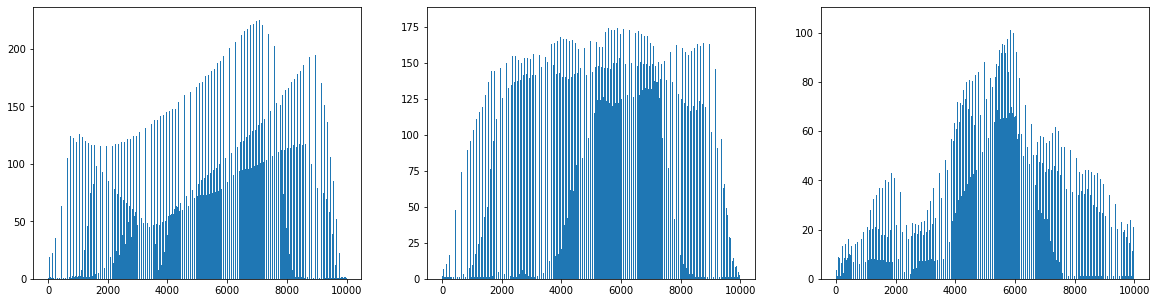

In [ ]:
#교재 연습문제 p302
#banana_mean 과 비슷한 사진 100장을 출력해보자

import numpy as np
import matplotlib.pyplot as plt
!wget https://bit.ly/fruits_300_data -O fruits_300.npy  #리눅스 셸 명령
fruits = np.load("fruits_300.npy")

banana = fruits[200:300].reshape(-1,100*100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis = (1,2))

banana_index = np.argsort(abs_mean)[:100]
f, axs = plt.subplots(10, 10, figsize = (10,10))
for i in range(0,10):
  for j in range(0,10):
    axs[i,j].imshow(fruits[banana_index[i*10 + j]], cmap = "gray_r")
    axs[i,j].axis("off")
plt.show()


**===================================================================================================**

# <h1> 6-2 K-평균 (K-Means)</h1>

* K-평균 군집 알고리즘 : 클러스터 중심을 이용하여 샘플들을 군집하는 알고리즘
* 클러스터 중심(Cluster Center) : K-평균 알고리즘이 만든 클러스터에 속한 샘플의 특성 평균값. 센트로이드(Centroid) 라고도 불림
* 이너셔 (Inertia) : 클러스터 중심과 샘플 사이 거리의 제곱합
* 엘보우 방법 (Elbow Method) : 최적의 클러스터 갯수를 정하는 방법 중 하나. 클러스터 개수에 따라 이너셔 감소가 꺾이는 지점이 적절한 클러스터 개수 k가 될 수 있다.
 
---


<h3> 과일 사진 분류 </h3>


* 맷플롯립, 넘파이
* 사이킷런 (sklearn.cluster 모듈 아래 KMeans() 클래스)

---

<K-평균 군집 알고리즘의 작동 방식>

1. 무작위로 k개의 클러스터 중심을 정합니다.
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정합니다.
3. 클러스터에 속한 샘플들의 평균값으로 클러스터 중심을 변경합니다.
4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복합니다.


In [ ]:
###########################################################################
#K-평균
#K-평균 알고리즘 소개

###########################################################################
#KMeans 클래스
!wget https://bit.ly/fruits_300_data -O fruits_300.npy  #기존 과일 데이터 사용

import numpy as np
fruits = np.load("fruits_300.npy")    #(샘플갯수, 높이, 너비)의 3차원 배열
fruits_2d = fruits.reshape(-1,100*100)  #(샘플갯수, 너비*높이) 의 2차원 배열로 변환


from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)  #n_clusters : 클러스터의 갯수 지정
km.fit(fruits_2d)     #비지도 학습이기 때문에 타깃 데이터가 없음
print(km.labels_)     #군집된 결과는 labels_ 속성에 저장됨. 레이블값 0,1,2와 레이블 순서는 아무 의미가 없음

print(np.unique(km.labels_, return_counts = True)) #레이블별로 모은 샘플의 갯수 출력
#각 111개, 98개, 91개의 샘플

import matplotlib.pyplot as plt
def draw_fruits(arr, ratio =1):
  n = len(arr)    #n은 샘플의 갯수
  rows = int((n//10) + 1) #한 줄에 10개씩 그릴 예정, 행의 갯수
  if rows < 2:
    cols = n      #샘플이 10개 미만이면 샘플의 갯수가 곧 열의 갯수
  else:
    cols = 10
  f, axs = plt.subplots(rows, cols, 
                        figsize = (cols*ratio, rows*ratio), squeeze = False)
  for i in range(0,rows):
    for j in range(0,cols):
      if i*10 + j < n:  #n개까지만 그립니다
        axs[i,j].imshow(arr[i*10 + j], cmap = "gray_r")
      axs[i,j].axis("off")
  plt.show()

draw_fruits(fruits[km.labels_ == 0])  #불리언 인덱싱 사용
draw_fruits(fruits[km.labels_ == 1])  
draw_fruits(fruits[km.labels_ == 2])  
#완벽하게 구별은 실패함

###########################################################################
#클러스터 중심

draw_fruits(km.cluster_centers_.reshape(-1,100,100), ratio=3) 
#KMeans 클래스가 최종적으로 찾은 클러스터 중심은 cluster_centers_ 속성에 저장됨
#그러나 이 배열은 fruit_2d의 클러스터 중심임 -> 100*100 크기로 재배열함

print(km.transform(fruits_2d[100:101])) #transform 메서드: 훈련데이터 샘플에서 클러스터 중심까지 거리로 변환해줌
#100번 인덱스 샘플의 거리 측정

print(km.predict(fruits_2d[100:101])) #예측결과 출력
draw_fruits(fruits[100:101])    #샘플 그림 확인
print(km.n_iter_) #알고리즘의 반복 횟수(클러스터 중심을 옮긴 횟수)는 n_iter 속성에 저장됨

###########################################################################
#최적의 k 찾기
#클러스터의 갯수조차 알 수 없는 경우라면??

#이너셔 : 클러스터 중심과 클러스터에 속한 샘플 사이의 거리의 제곱
#엘보우 방법 (Elbow) : 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여
#                      최적의 클러스터 갯수를 찾는 방법

#KMeans 클래스는 자동으로 이너셔를 계산하여 interia_속성으로 제공함
inertia = []
for k in range(2,7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

###########################################################################
#과일을 자동으로 분류하기


**===================================================================================================**

# <h1> 6-3 주성분 분석 (Principal Component Analysis)</h1>

* 차원 (Dimension) : 머신러닝에서 특성을 차원이라고도 부른다
* 차원 축소 (Dimensionality Reduction) : 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도학습 모델의 성능을 향상시킬 수 있는 방법
* 주성분 분석 (Principal Component Analysis, PCA) : 차원 축소 알고리즘의 대표적인 예시
* 설명된 분산 (Explained Variance) : 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

---


<h3> 과일 사진 분류 </h3>


* 맷플롯립, 넘파이
* 사이킷런 (sklearn.decomposition 모듈 아래 PCA() 클래스)

---

1. 차원 축소는 저장 공간을 줄이고 시각화 하기 쉽다. 또한 다른 알고리즘의 성능을 높일 수도 있다

2. 사이킷런의 PCA 클래스는 변환된 데이터에서 원본 데이터로 복원하는 메서트도 제공한다.

3. 3개 이하로 차원을 줄이면 데이터의 시각화가 가능하다. 데이터의 시각화 과정에서 예상치 못한 통찰을 얻을 수도 있다.


In [ ]:
###########################################################################
#주성분 분석

#차원과 차원 축소

#주성분 분석 소개

###########################################################################
#PCA 클래스

!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load("fruits_300.npy")
fruits_2d = fruits.reshape(-1,100*100)

from sklearn.decomposition import PCA
pca = PCA(n_components = 50)  #n_components 매개변수에 주성분의 갯수를 지정해야 함
pca.fit(fruits_2d)    #비지도 학습이기 때문에 타깃값 제공X
print(pca.components_.shape)  #PCA클래스가 찾은 주성분들은 components_ 속성에 저장됨

import matplotlib.pyplot as plt
def draw_fruits(arr, ratio =1):
  n = len(arr)    #n은 샘플의 갯수
  rows = int((n//10) + 1) #한 줄에 10개씩 그릴 예정, 행의 갯수
  if rows < 2:
    cols = n      #샘플이 10개 미만이면 샘플의 갯수가 곧 열의 갯수
  else:
    cols = 10
  f, axs = plt.subplots(rows, cols, 
                        figsize = (cols*ratio, rows*ratio), squeeze = False)
  for i in range(0,rows):
    for j in range(0,cols):
      if i*10 + j < n:  #n개까지만 그립니다
        axs[i,j].imshow(arr[i*10 + j], cmap = "gray_r")
      axs[i,j].axis("off")
  plt.show()

draw_fruits(pca.components_.reshape(-1, 100, 100))  #주성분을 100*100 이미지처럼 출력
#원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸것(=데이터셋에서 어떤 특징을 잡아낸 것)

#원본 데이터를 주성분에 투영하여 특성의 갯수를 1만개에서 50개로 바꾸자
#원본 데이터를 각 주성분으로 분해하는 것으로 생각할 수도 있음
print(fruits_2d.shape)  #(300, 10000) 출력
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) #(300, 50) 출력

###########################################################################
#원본 데이터 재구성
#원본 데이터로 복원해보자

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape) #(300, 10000) 출력, 1만개의 특성으로 복원됨

fruits_reconstruct = fruits_inverse.reshape(-1,100,100) #100*100 크기로 바꾸어 출력해보자
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

###########################################################################
#설명된 분산
print(np.sum(pca.explained_variance_ratio_))    #50개 주성분에 대한 설명된 분산 모두 더하기

plt.plot(pca.explained_variance_ratio_)         #처음 10개의 주성분만 대부분의 분산을 표현함
plt.show()

###########################################################################
#다른 알고리즘과 함께 사용하기

#로지스틱 회귀 모델을 사용해보자

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 + [2]*100) #지도학습 모델이기 때문에 타깃값을 만들자

#교차검증 실시
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))  #fit_time 항목에 각 교차검증 폴드의 훈련시간이 기록되어 있음

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores["test_score"]))   #100% 정확도
print(np.mean(scores["fit_time"]))  #훈련시간 대폭 감소

#---------------------------------------------------------
#설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델을 만들어보자
pca = PCA(n_components = 0.5)  #여기에 정수가 아닌 0~1 사이의 비율을 넣으면 된다
pca.fit(fruits_2d)
print(pca.n_components_)      #2개의 특성만으로 원본 데이터에 있는 분산의 50% 표현 가능

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)       #(300,2) 출력 -> 300개의 샘플, 2개의 주성분

#교차검증 실시
score = cross_validate(lr, fruits_pca, target)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

from sklearn.cluster import KMeans  #차원축소된 데이터로 K-평균 알고리즘을 실행시켜보자
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

for label in range(0,3):          #클러스별 과일 데이터 출력
  draw_fruits(fruits[km.labels_ == label])
  print("\n")             

for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(["Pinepple", "Banana", "Apple"])
plt.show()

###########################################################################
#주성분 분석으로 차원 축소


**===================================================================================================**